In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr, spearmanr

import env
import wrangle

In [3]:
df = wrangle.wrangle_zillow()

### 2. Make sure to perform a train, validate, test split before and use only your train dataset to explore the relationships between independent variables with other independent variables or independent variables with your target variable.

In [6]:
df_train_and_validate, df_test = train_test_split(df, random_state=123)

In [7]:
df_train, df_validate = train_test_split(df_train_and_validate)

In [8]:
df_train.shape

(1582625, 7)

In [9]:
df_validate.shape

(527542, 7)

In [10]:
df_test.shape

(703389, 7)

### 3. Write a function named plot_variable_pairs that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.

In [11]:
df_train.head(3)

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
696197,3.0,2.0,2114.0,131109.0,1965.0,1941.65,6037.0
2892265,0.0,1.0,1200.0,166000.0,1930.0,2918.36,6037.0
1084598,3.0,2.0,1389.0,510826.0,1965.0,6129.58,6059.0


In [19]:
def plot_variable_pairs(df):
    sns.lmplot(x = 'calculatedfinishedsquarefeet', y = 'taxvaluedollarcnt',data = df_train, line_kws = {'color': 'red'})
    plt.show()

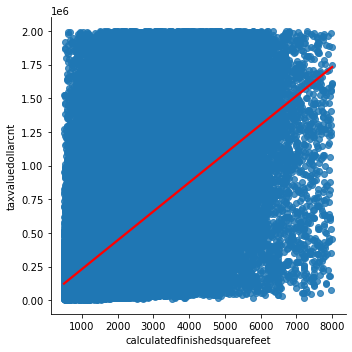

In [20]:
plot_variable_pairs(df_train)

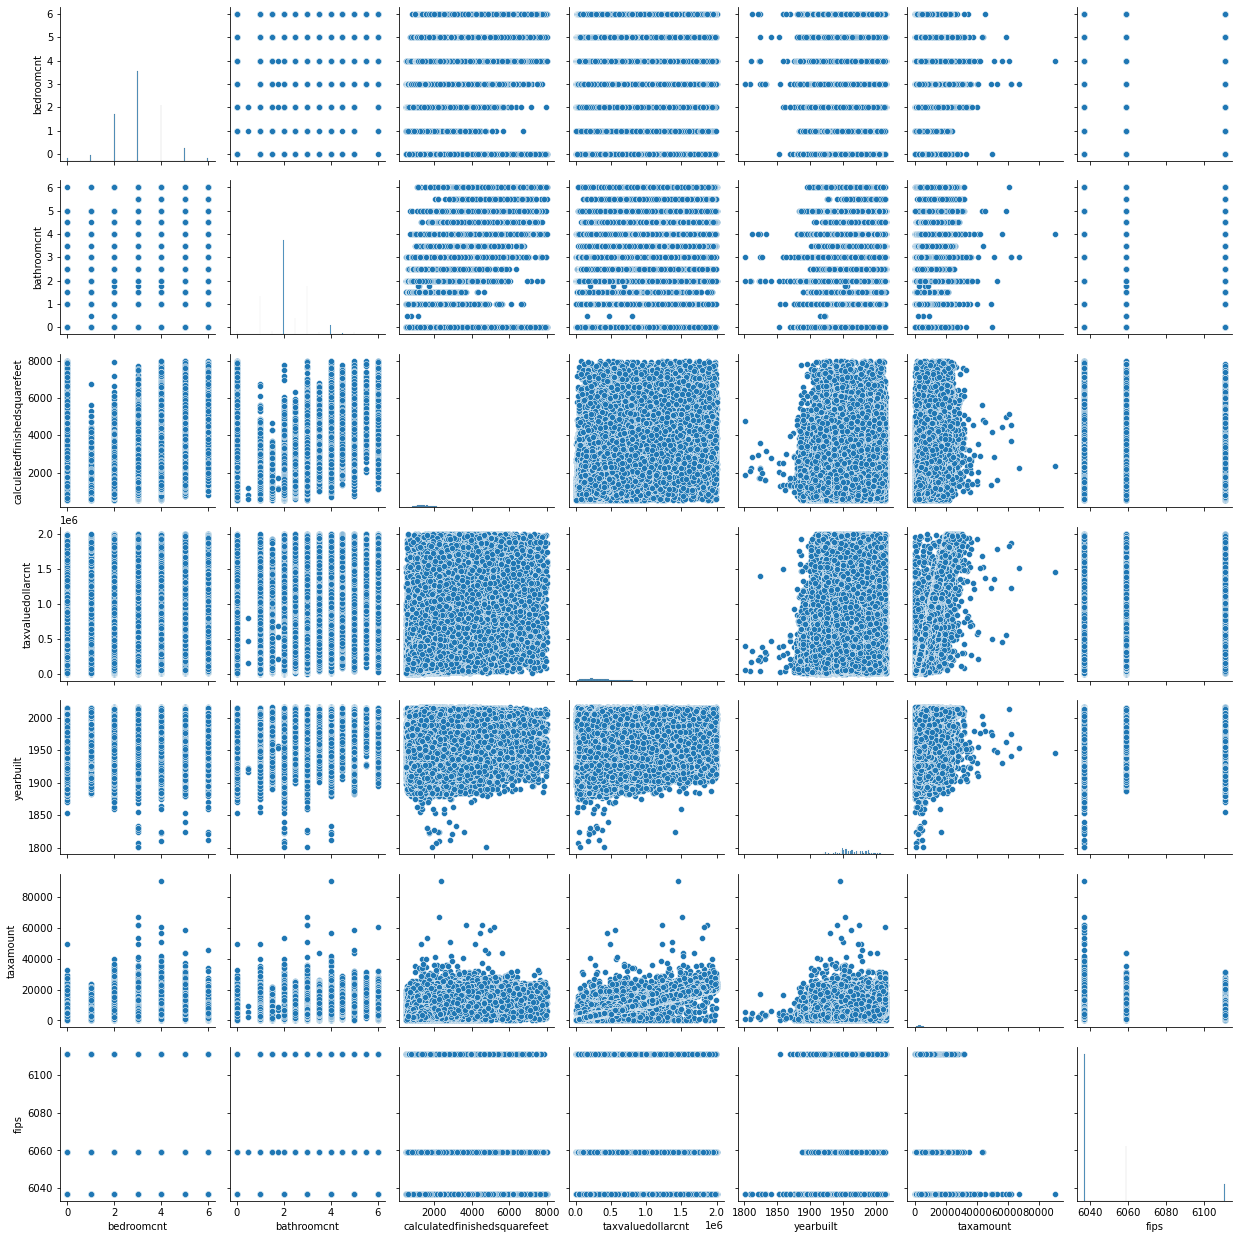

In [18]:
sns.pairplot(df_train)

In [21]:
df_corr = df_train.corr()
df_corr

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount
bedroomcnt,1.000000,0.612710,0.545145,0.236350,0.087650,0.243837
bathroomcnt,0.612710,1.000000,0.684065,0.455276,0.398812,0.459914
calculatedfinishedsquarefeet,0.545145,0.684065,1.000000,0.556885,0.243303,0.559945
taxvaluedollarcnt,0.236350,0.455276,0.556885,1.000000,0.225031,0.975167
yearbuilt,0.087650,0.398812,0.243303,0.225031,1.000000,0.228372
taxamount,0.243837,0.459914,0.559945,0.975167,0.228372,1.000000


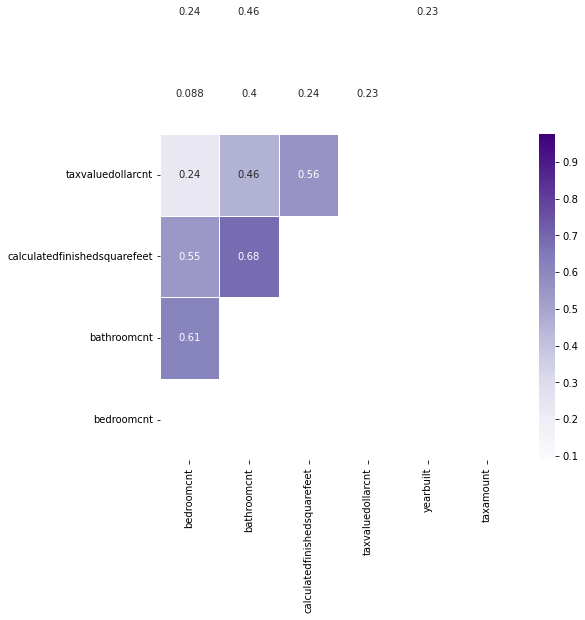

In [25]:
plt.figure(figsize=(8, 6))
sns.heatmap(df_corr, cmap = 'Purples', annot=True, linewidth=0.5, mask = np.triu(df_corr))
plt.ylim(0, 4)
plt.show()